# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [2]:
import pandas as pd
data = pd.read_csv("orange_small_churn_data.train")
labels = pd.read_csv("orange_small_churn_labels.train", header=None)

In [3]:
print(labels.head(4))
print(data.head(3))

   0
0 -1
1 -1
2 -1
3  1
   Var1  Var2  Var3  Var4  Var5    Var6  Var7  Var8  Var9  Var10   ...    \
0   NaN   NaN   NaN   NaN   NaN  3052.0   NaN   NaN   NaN    NaN   ...     
1   NaN   NaN   NaN   NaN   NaN  1813.0   7.0   NaN   NaN    NaN   ...     
2   NaN   NaN   NaN   NaN   NaN  1953.0   7.0   NaN   NaN    NaN   ...     

    Var221   Var222      Var223  Var224  Var225  Var226   Var227  \
0  Al6ZaUT  vr93T2a  LM8l689qOp     NaN     NaN    fKCe  02N6s8f   
1     oslk  6hQ9lNX  LM8l689qOp     NaN    ELof    xb3V     RAYp   
2     zCkv  catzS2D  LM8l689qOp     NaN     NaN    FSa2     ZI9m   

          Var228  Var229  Var230  
0  xwM2aC7IdeMC0     NaN     NaN  
1        55YFVY9    mj86     NaN  
2  ib5G6X1eUxUn6    mj86     NaN  

[3 rows x 230 columns]


2\. Рассчитайте доли классов `отток` и `не отток`.

In [4]:
import numpy as np
pd.DataFrame(data=labels.groupby(0).size().reset_index(name='counts')['counts'].apply(lambda x: x/labels.size)).rename(index={0:'-1',1: '1'}, columns={'counts':'rate'})

,rate
-1,0.9256
1,0.0744


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [5]:
data['Var1'].iloc[[0,1,3, 100]]

0     NaN
1     NaN
3     NaN
100   NaN
Name: Var1, dtype: float64

In [6]:
data['Var1'].iloc[labels.loc[labels[0] == -1].index.values].mean()

10.900934579439252

In [7]:
data['Var1'].iloc[labels.loc[labels[0] == 1].index.values].mean()

12.571428571428571

In [8]:
def getCorrelation(data, labels, column, label_1, label_minus_1):
    return data[column].iloc[labels.loc[labels[0] == label_1].index.values].mean() \
- data[column].iloc[labels.loc[labels[0] == label_minus_1].index.values].mean()

In [9]:
getCorrelation(data,labels, 'Var1', 1, -1)

1.6704939919893196

In [10]:
import math
corrs = {}
for name in data.columns[0:190]:
    val = abs(getCorrelation(data,labels, name, 1, -1))
    if (math.isnan(val)):
        val = 0.0
    corrs[name] = val

In [11]:
print(sorted(corrs, key=corrs.__getitem__)[-20:])

['Var92', 'Var36', 'Var182', 'Var5', 'Var38', 'Var139', 'Var33', 'Var10', 'Var124', 'Var59', 'Var154', 'Var153', 'Var113', 'Var111', 'Var114', 'Var180', 'Var177', 'Var53', 'Var69', 'Var131']


In [12]:
for key in sorted(corrs, key=corrs.__getitem__)[-20:]:
    print("key = ", key," val = ",corrs[key])

key =  Var92  val =  57588.45971162
key =  Var36  val =  57993.37464931124
key =  Var182  val =  61614.77928464976
key =  Var5  val =  66949.86675576452
key =  Var38  val =  77671.00355923455
key =  Var139  val =  95864.70072781143
key =  Var33  val =  98084.97129186604
key =  Var10  val =  101756.8609751385
key =  Var124  val =  122003.96184798809
key =  Var59  val =  130636.05560051865
key =  Var154  val =  141731.55887850467
key =  Var153  val =  151453.3519627573
key =  Var113  val =  162842.18453814648
key =  Var111  val =  193165.14612373238
key =  Var114  val =  241634.73453810182
key =  Var180  val =  320162.9532710281
key =  Var177  val =  401748.7452799191
key =  Var53  val =  438907.6790387182
key =  Var69  val =  480858.38842908666
key =  Var131  val =  10346077.81682243


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


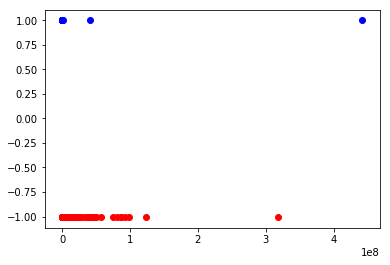

In [21]:
pylab.scatter(data['Var131'].loc[labels.index[labels[0] == -1].tolist()], \
              labels.loc[labels.index[labels[0] == -1].tolist()], color='r')
pylab.scatter(data['Var131'].loc[labels.index[labels[0] == 1].tolist()], \
              labels.loc[labels.index[labels[0] == 1].tolist()], color='b')

/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45d3f61128>,
      dtype=object)

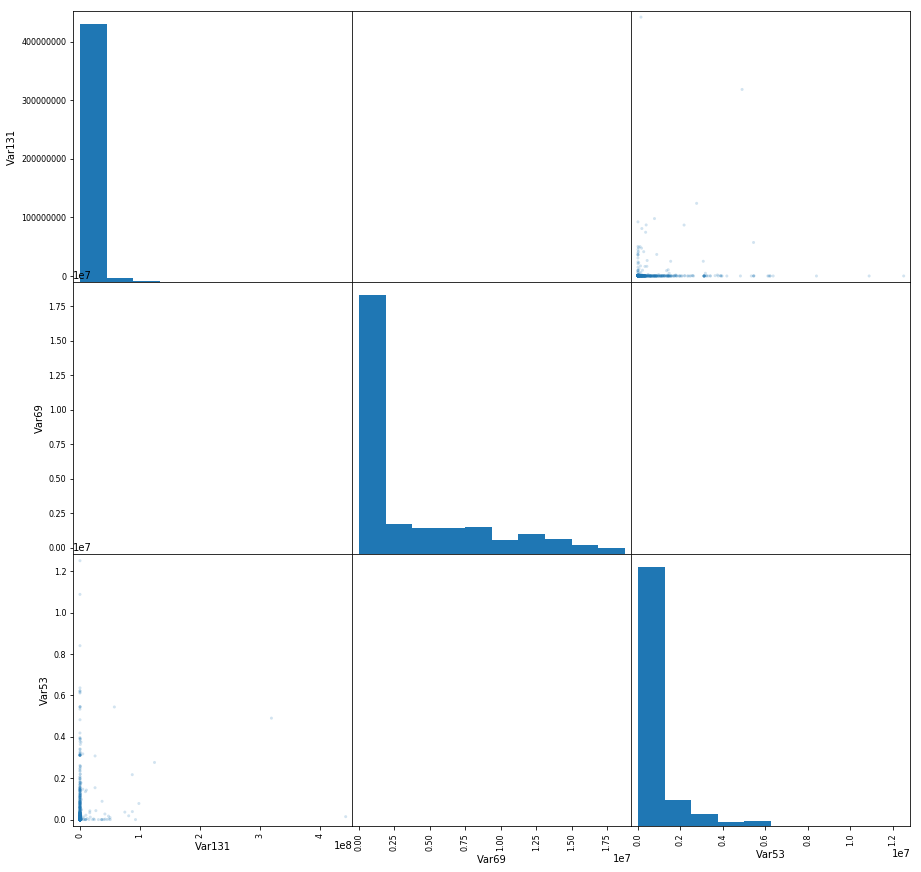

In [27]:
pd.tools.plotting.scatter_matrix(data[['Var131', 'Var69', 'Var53']], alpha=0.2, figsize=(15,15), diagonal='hist')

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?